In [1]:
# ライブラリの読み込み
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
# CSV読み込み
df = pd.read_csv('./SMSSpamCollection.txt', delimiter="\t",header=None)

In [3]:
df.head()

,0,1
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df.columns = ['class', 'message']
df = df.rename(columns={0:'class',1:'message'})
df.head()

,class,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
vec_count = CountVectorizer(min_df=3) # min_dfは単語の最小出現回数を表す
vec_count.fit(df['message'])

# 単語の種類
print('word size: ', len(vec_count.vocabulary_))
# 先頭５件の単語を表示
print('word content: ', list(vec_count.vocabulary_.items())[0:5])
print(vec_count.get_feature_names())

word size:  2817
word content:  [('go', 1089), ('until', 2579), ('point', 1883), ('crazy', 687), ('available', 348)]
['00', '000', '02', '0207', '03', '04', '05', '06', '07xxxxxxxxx', '0800', '08000839402', '08000930705', '08000938767', '08001950382', '08002986906', '0808', '0845', '08452810073', '0870', '08701417012', '08702840625', '08707509020', '0871', '08712300220', '08712405020', '08712460324', '08715705022', '08717898035', '08718720201', '087187262701', '08718727870', '09', '09050090044', '09061209465', '09061221066', '09061790121', '09063458130', '09066612661', '10', '100', '1000', '1000s', '100percent', '10am', '10k', '10p', '11', '114', '11mths', '11pm', '12', '121', '123', '125gift', '12hrs', '1327', '14', '145', '1450', '15', '150', '1500', '150p', '150pm', '150ppermesssubscription', '150ppm', '16', '18', '18yrs', '1956669', '1st', '1winaweek', '1x150p', '20', '200', '2000', '2003', '2004', '2005', '20p', '21', '21st', '220', '24', '25', '250', '25p', '26', '28', '29', '2da

In [6]:
# トレーニング・評価データ分割
X = df['message']
Y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.7, test_size=0.3)

In [7]:
cv = CountVectorizer(min_df=3)
cv.fit(X_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=3,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [8]:
# トレーニング・評価データをベクトル化
X_train_vec = cv.transform(X_train)
X_test_vec = cv.transform(X_test)

In [9]:
# 先頭５件のベクトル化データ表示
pd.DataFrame(X_train_vec.toarray()[0:5],columns=cv.get_feature_names())

,00,000,02,0207,03,04,06,0800,08000839402,08000930705,...,you,your,yours,yourself,yr,yrs,yummy,yun,yup,zed
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,3,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [10]:
model = MultinomialNB()
model.fit(X_train_vec,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [11]:
print("Train acc = %.3f" % model.score(X_train_vec,y_train))
print("Test acc = %.3f" % model.score(X_test_vec,y_test))

Train acc = 0.988
Test acc = 0.988


In [12]:
data = np.array(['He wrote Dictionaries.',
             'Why am I always so slow',
             'Free service! Please contact me.'])
df_data = pd.DataFrame(data,columns=['message'])
df_data_vec = cv.transform(df_data['message'])

In [13]:
model.predict(df_data_vec)

array(['ham', 'ham', 'spam'], dtype='<U4')

In [14]:
model_scores = []
train_sizes = range(100, len(X_train), 100)

In [15]:
for s in train_sizes:
    X_slice,_,y_slice,_ = train_test_split(X_train, y_train, train_size=s, stratify=y_train)
    cv.fit(X_slice)
    X_slice_vec = cv.transform(X_slice)
    X_test_vec = cv.transform(X_test)
    model.fit(X_slice_vec, y_slice)
    model_scores.append(model.score(X_test_vec, y_test))

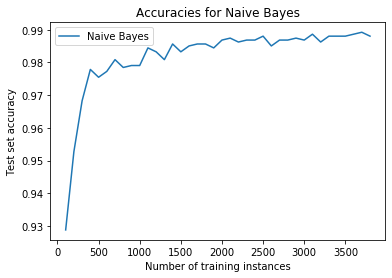

In [16]:
plt.plot(train_sizes,model_scores,label='Naive Bayes')

plt.title('Accuracies for Naive Bayes')
plt.legend()
plt.xlabel('Number of training instances')
plt.ylabel('Test set accuracy');